In [2]:
import pandas as pd
import sympy as sp
import mpmath as mp 
import numpy as np
from scipy.fft import fft, ifft
from latex2sympy2 import latex2sympy, latex2latex
from manim import *
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
from manim_voiceover import VoiceoverScene
from manim_voiceover.services.recorder import RecorderService
from manim_voiceover.services.gtts import GTTSService
import warnings
warnings.filterwarnings("ignore")
config.media_width = "100%"
config.verbosity = "WARNING"
import compass_functions as cf
from sympy import symbols, Eq, latex, sqrt,solve ,Function 
from sympy import   I, simplify, expand , print_latex,init_printing
from sympy import Symbol, sin,cos,arg,exp ,integrate,Derivative,Integral  
from sympy.utilities.lambdify import lambdify
sp.init_printing()
from IPython.display import Markdown as md
#DSP con placa de audio 
import sounddevice as sd
# Ajustes del fondo de plot para matplotlib 
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "white",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})



## Definiciones Sympy

In [3]:
# Símbolos típicos definidos como reales o complejos
t=sp.Symbol('t',real=True)
i=sp.I #Constante imaginaria símbólica sqrt(-1)
pi=sp.pi # Pi en foma simbólica dentro de sympy
T_p=sp.Symbol('T',real=True) # Período usado en la expresión de omega
omega=sp.Symbol('omega',real=True)
omega_eq=sp.Equality(omega,2*pi/T_p)
Omega=sp.Symbol('Omega',complex=True)
theta=sp.Symbol('theta',real=True)
Theta=sp.Symbol('Theta',complex=True)
R=sp.Symbol('R',real=True)
L=sp.Symbol('R',real=True)

tau=sp.Symbol('tau',real=True)
tau_eq=sp.Equality(tau,2*pi)

cplx_exp_rect = cos(t)+i*sin(t)
cplx_exp_polar=exp(i*t) 
sp.simplify(sp.sqrt(sp.conjugate(3+2*i)*(3+2*i)))

In [4]:
# serie_fourier_t_continuo_tex_rhs=r" \sum_{k=0}^{N-1}c_k e^{i \omega k n}"
# serie_fourier_tc=latex2sympy(serie_fourier_t_continuo_tex)

R_N_tex= r"\frac{1}{2 \sin{\frac{\pi}{N}}})"
R_N=latex2sympy(R_N_tex )
R_N


In [5]:
a=sp.Symbol('a',real=True)
b=sp.Symbol('b',real=True)
ElipseImplicita_tex=r"\left(\frac{x}{a}\right)^2+\left(\frac{y}{b}\right)^2"

ElipseImplicita_sympy=sp.Eq(latex2sympy(ElipseImplicita_tex),1)
ElipseImplicita_sympy

In [6]:
F=sp.Symbol('F',complex=True)
foco_ab_tex=r"  \sqrt{a^2-b^2} "
foco_ab_sympy=sp.Equality(F,latex2sympy(foco_ab_tex))
foco_ab_sympy

In [74]:
t=sp.Symbol('t',real=True)
i=sp.I #Constante imaginaria símbólica sqrt(-1)
pi=sp.pi # Pi en foma simbólica dentro de sympy
phi=sp.GoldenRatio

# Defino la función en SymPy
#a=sp.Rational(1,2)*(1+i)
a=sp.Integer(4)  
b=sp.Integer(2)
R_add=sp.Rational(a+b,2)
R_subs=sp.Rational(a-b,2)
Elipse_21_compas=R_add*exp(i*t)+R_subs*exp(-i*t) 
# Obtengo su expresión en LaTex
Elipse_21_latex=latex(Elipse_21_compas)
Elipse_21_compas

## Posiciones Manim

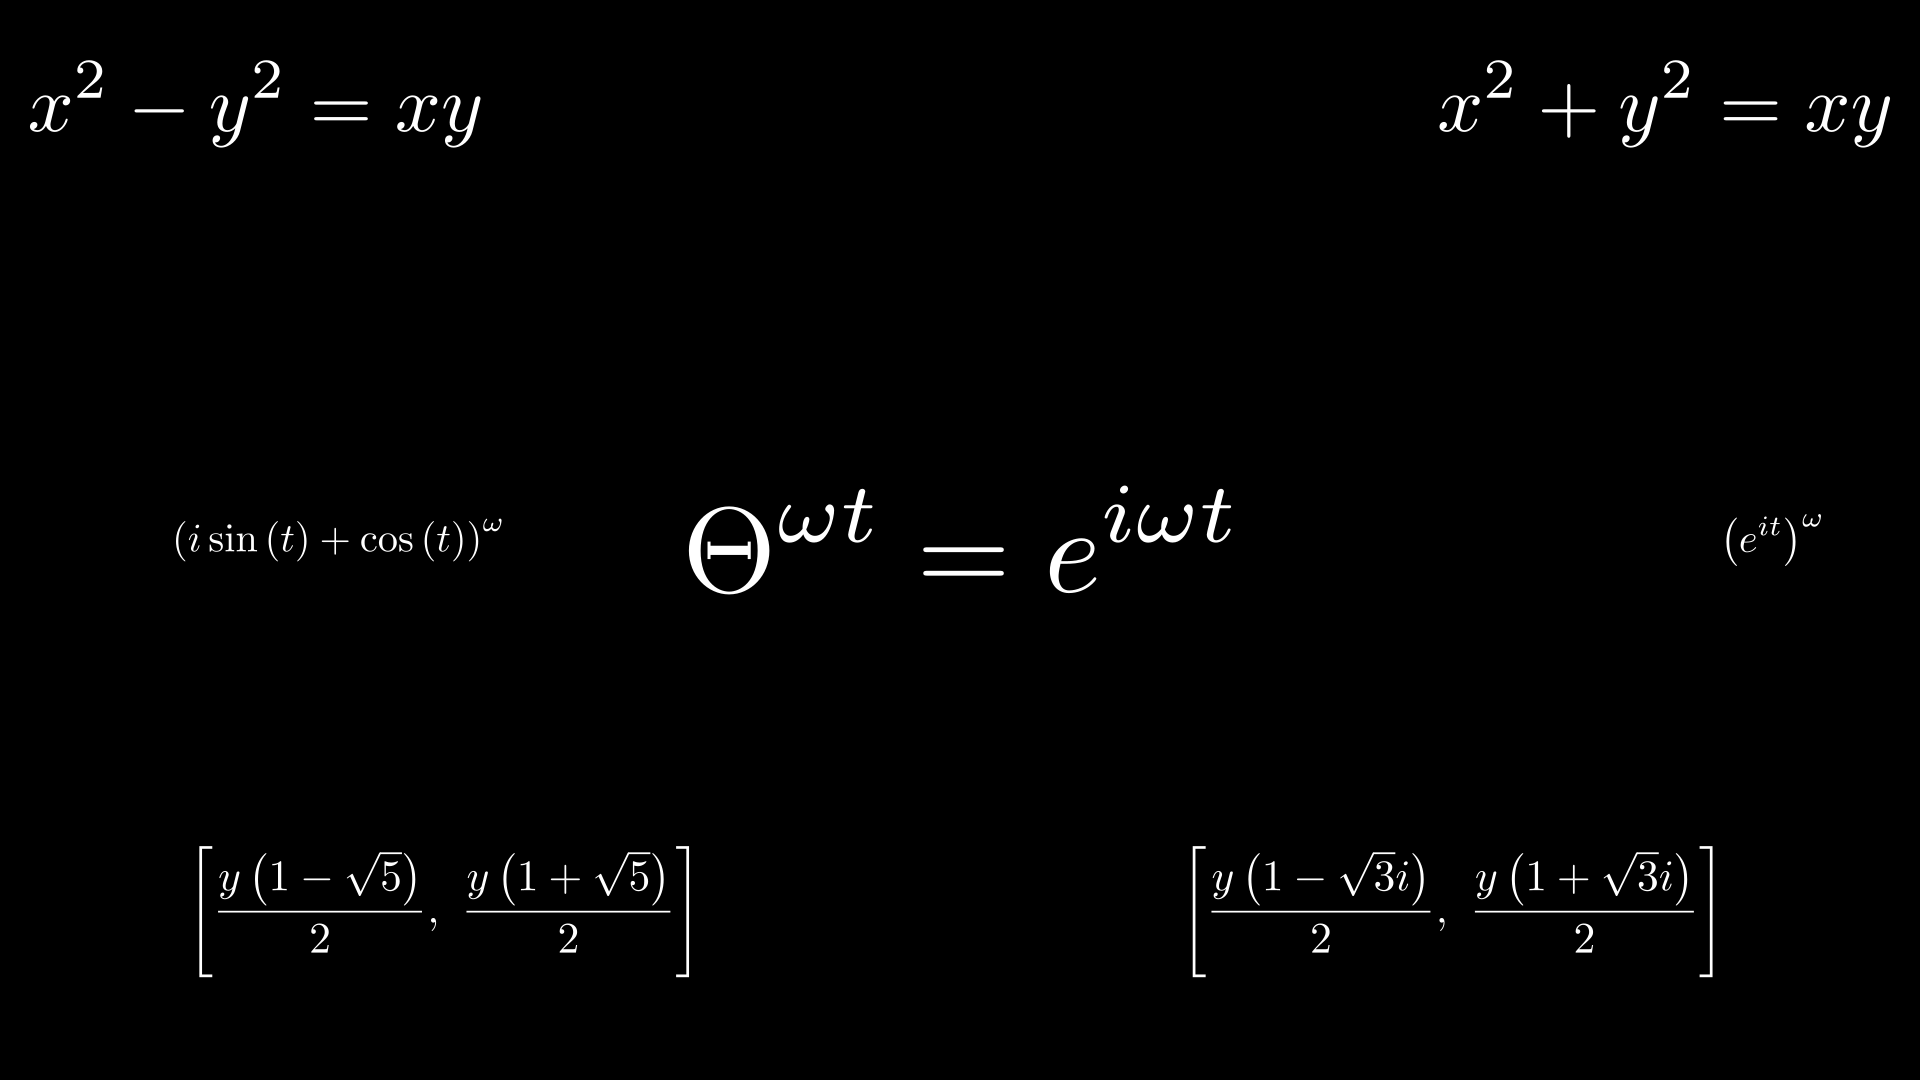

In [7]:
%%manim -qh MostrarTex
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
Theta_omega_t= sp.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sp.Equality(Theta**t,exp(i*t))
phi_relation=Eq(x**2-y**2,x*y)
cplx_phi_relation=Eq(x**2+y**2,x*y)

TexLeft=MathTex(latex(cplx_exp_rect**omega)).to_edge(LEFT)
TexRight=MathTex(latex(cplx_exp_polar**omega)).to_edge(RIGHT)
TexCenter=MathTex(latex(Theta_omega_t))
TexUL=MathTex(latex(phi_relation)).to_edge(UL)
TexUR=MathTex(latex(cplx_phi_relation)).to_edge(UR)
TexDL=MathTex(latex(solve(phi_relation,x))).to_corner(DL)
TexDR=MathTex(latex(solve(cplx_phi_relation,x))).to_corner(DR)

Center_scale=1.8
Right_scale=0.6
Left_scale=0.6
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65

class MostrarTex(Scene):
    def construct(self):      
        self.add(TexRight.scale(Right_scale))
        self.add(TexLeft.scale(Left_scale))
        self.add(TexCenter.scale(Center_scale))
        self.add(TexUL.scale(UL_scale))
        self.add(TexUR.scale(UR_scale))       
        self.add(TexDL.scale(DL_scale))
        self.add(TexDR.scale(DR_scale))

# Escenas usadas

## Primera Escena

Aquí un ejemplo de escena simple de LaTex con Voiceover desde texto .

In [8]:
%%manim -qh TituloPortada
k_tiempo=2
esperar=3
Titulo=r"""
Si Ptolomeo  hubiese conocido a Fourier.

$$\zeta ^ t=  R_{_{_+}} \Theta^{\omega_{\alpha} t} +R_{_{_-}} \Theta^{-\omega_{\beta} t}$$

 

"""
VoiceTitulo="Hola, bienvenidos al planeta matemático llamado Tau"
class TituloPortada(VoiceoverScene):
    def construct(self):
        self.set_speech_service(GTTSService(lang="es", tld="com",gender="male", accent="us"))
        tex = Tex(Titulo, font_size=70)
        with self.voiceover(text=VoiceTitulo) as tracker:
            self.play(Write(tex), run_time=tracker.duration*k_tiempo)

        #self.play(Write(tex))
        self.wait(esperar)

## 2da

In [102]:
ficcion=r""" 

Ésta es una historia de ficción que tiene el objetivo de ayudar a ilustrar algunas intuiciones matemáticas que considero interesantes. 


$$ $$
Se agregarán detalles que pueden ser de interés para estudiantes que por primera vez se enfrentan a ideas como La Serie de Fourier y les entregan unas fórmulas mágicas sin demasiado contexto. Éste es el contexto que a mi me hubiese gustado que me dieran cuando estudié estos temas. 

$$ $$
En la descripción hay un link a el código fuente usado para la realización de éste contenido usando SymPy, Manim, NumPy, Matplotlib, y varias librerías de Python adecuadas tanto para el cálculo y la manipulación simbólica como también para la creación de contenido audiovisual en un workflow simplificado que me ha sido de utilidad,ya que vengo de la época en que se usaba Matlab en la universidad.

$$ $$ 
Espero que el contenido compartido sea de utilidad para  divulgadores que se están iniciando en la creación de contenido


"""


In [103]:
%%manim -qh SegundaEscena
texto_escena=Tex(ficcion).scale(0.45)
texto_escena.arrange(center=True, aligned_edge=RIGHT)  
class SegundaEscena(Scene):
    def construct(self):
        #self.add(texto_escena)
        self.play(Write(texto_escena),run_time=6)
        self.wait(12)
        

## Colección de Textos como variables para manim


In [104]:
# Texto y Fórmulas a presentar con el plot


ElipseOndas_0 = r""" 

¿Recuerdas la siguiente ecuación implícita?

$$\left(\frac{x}{a}\right)^2+\left(\frac{y}{b}\right)^2=1$$ 

Siendo $a$ y $b$ los valores de los semiejes mayor y menor respectivamente. 

$$F_1=\sqrt{a^2-b^2}$$

$$F_2=-F_1$$

Siendo $F_1$ y $F_2$ las distancias focales de la elipse. 



"""



ElipseOndas_1=r"""

Consideremos inicialmente una elipse centrada en el origen $z_o=0$ 
$$ $$ 
Veremos que ésta curva se puede ver como la composición  de dos acciones de rotación inversas o de dos ondas fundamentales.

$z_o , R_{_+} , R_{_-} \in \mathbb{C}$  

$t \in \mathbb{R}$    

$k \in \mathbb{Z}$

$$|R_{_+}|>|R_{_-}|$$  

$$z(t)=z_o+ R_{_+} e^{it} +R_{_-} e^{-it}$$
"""
ElipseOndas_1b=r"""

Si $z_o=0$ tenemos:

$$z(t)=R_{_+} e^{it} +R_{_-} e^{-it}$$

$$a=R_{_+}+R_{_-}$$ 

$$b=R_{_+}-R_{_-}$$

$$z(t)=a\cos{t}+i b \sin{t}$$ 

$$F_{_{\pm}}=\pm 2\sqrt{R_{_+}R_{_-}}=2 e^{i\pi k} \sqrt{R_{_+}R_{_-}}$$

"""


ElipseOndas_2=r"""  

En Tau expresan la elipse de forma similar pero usando $\Theta=e^i$

$$z(t)=R_{_+} \Theta^{t} +R_{_-} \Theta^{-t}$$ 

Recordando que :

$$ R_{_+} , R_{_-} \in \mathbb{C}$$  

$$z(t)=R_{_+} e^{it} +R_{_-} e^{-it}$$ 

Y las posiciones de los focos en el plano complejo se pueden expresar como:

$$F_{_{\pm}}=2 e^{i\pi k} \sqrt{R_{_+}R_{_-}}$$

Esto nos permite dibujar elipses desplazadas con bastante facilidad. 

"""


ElipseOndas_3=r"""  

Recordando que el coseno en si mismo es el "promedio" de dos acciones fundamentales :

$$a \cos(t)=a\frac{e^{it}+e^{-it}}{2}$$


Y que el seno es la "diferencia" entre dos acciones fundamentales y luego desplazada 90º

$$b \sin(t)=b\frac{e^{it}-e^{-it}}{2i}$$


Con un poco de manipulación algebraica,es fácil ver que podemos expresar la curva  de forma paramétrica:

$$z(t)=a\cos{t}+i b \sin{t}$$ 

Con 

$$a=R_{_+}+R_{_-}$$ 
$$b=R_{_+}-R_{_-}$$




"""



## Texto para crear audio y subtítulos automáticamente
voice_conicas="""
Si te enseñaron sobre las  cónicas  probablemente recuerdes 

La  ecuación implícita para un elipse usando números reales

Ésta forma de ver la elipse no está incluida en el artículo de Wikipedia así que creo es 
interesante empezar por aquí
"""

In [11]:


imaginar_modelo_tres_cuerpos_1=r"""
Para situarnos en éste experimento mental imaginaremos inicialmente un modelo simplificado de las órbitas de 3 cuerpos celestes del tipo Estrella-Planeta-Satélite (Sol-Tierra-Luna) 

$$ $$
Imaginaremos cómo serían presentados típicamente éstos temas en un planeta matemático ficticio que llamaremos Tau. 

$$ $$ 

Imaginaremos algunos personajes  de Tau, que llamaremos Claudius, Joseph, Antoine y Sebastian. 

$$ $$ 

Seguramente contar la historia completa llevará varios videos, pero intentaré contar al menos el principio.
""" 

imaginar_modelo_tres_cuerpos_2=r"""
Todos se conocían de la universidad, donde asistían juntos a la cátedra de Hard Leon, considerado el más grande matemático de la historia de Tau.
$$ $$ 
Veremos como Claudius está inspirado en personajes como Ptolomeo-Kepler-Copernico-etc, y cómo su obsesión inicial era sumar epiciclos.  
$$ $$ 
Joseph está inspirado en Fourier, sufría mucho el frío y estaba obsesionado en modelar el comportamiento del calor usando ecuaciones diferenciales.  
$$ $$ 
Antoine está inspirado en Lissajous y sus figuras y sus experimentos como el Armonógrafo, que en Tau imaginaremos como una especie de osciloscopio usado para visualizar representaciones paramétricas.
$$ $$ 
Hard Leon, está inspirado en Leonhard Euler que imaginaremos que era el profesor de Análisis Matemático de los personajes mencionados.

"""


luz_calor_epiciclos_1=r"""

Entender cómo en Tau el trabajo de Joseph está íntimamente relacionado con el trabajo de Claudius llevará un poco de tiempo.  
$$ $$ 
Pero digamos como introducción que Joseph sufría mucho el frío (Según contó Steven S. en una entrevista con Grant S. ésto fue así en la Tierra, Fourier "tenía literalmente frío" ver link en la descripción). 
$$ $$ 
Es por ésto que Joseph en Tau,estaba buscando describir el comportamiento del calor usando el equivalente a  lo que en la Tierra llamamos ecuaciones diferenciales. 

"""


luz_calor_epiciclos_2=r"""

Uno de los experimentos mentales de Joseph era unir dos barras metálicas una caliente y otra fría (o mejor dicho, menos caliente), y estudiar y tratar de modelar qué pasaba luego de un determinado tiempo $t$ con la distribución del calor entre las dos barras unidas. 
$$ $$ 
De forma misteriosa, inspirado por su profesor Hard Leon, ésto lo llevó a  aproximar una función que representada gráficamente tenía forma de escalón (ya que representaba un salto  entre las temperaturas de las dos barras en el punto de unión ). 
$$ $$ 
Las soluciones de esa ecuación diferencial, terminaron dando una solución que parecía funcionar usando la suma de "infinitas" combinaciones de ondas que tenían frecuencias que eran múltiplos enteros de una frecuencia fundamental que dependía de las longitudes de los materiales usados. (Ver fenómeno de Gibbs)
"""


claudius_elipses_y_simetrias=r"""
Claudius mientras tanto jugaba con  los cuerpos celestes usando modelos geocéntricos, heliocéntricos y otros. 

$$ $$ 

Usó circunferencias inicialmente y luego se dió cuenta de que todo eran elipses de diferentes excentricidades, ya que todo lo que él era capaz de describir matemáticamente  veía que en esencia  estaba formado por la composición (o suma vectorial) de dos acciones/propiedades fundamentales opuestas  del tipo:

"""


simetrias_de_claudius=r"""
* (giro_sentido_anti_horario,giro_sentido_horario)

* $(+),(-)$ 

* (calor,frío)

* (luz,oscuridad) 

* (arriba, abajo)

* (derecha,izquierda)

* $(i,-i)$

* (1,-1)   

"""


la_obsesion_de_claudius=r"""
La obsesión  de Claudius era sumar epiciclos de forma tal que se puedan predecir mediante modelos matemáticos sencillos las trayectorias documentadas de los cuerpos celestes.

Pero al igual que el trabajo de Joseph, sus ideas llegaron mucho mas lejos y tuvieron aplicaciones en infinidad de áreas del conocimiento en la historia de Tau. 

"""
la_noche_de_los_descubrimientos=r"""

Los historiadores científicos de Tau cuentan que Joseph y Claudius tomaron nota  de las similitudes de sus trabajos cuando ambos en una noche larga de charla mientras estudiaban para la próxima clase con Hard Leon terminaron intentando calcular cuántas sub-lunas harían falta y con qué radios y períodos orbitales tendrían que girar una alrededor de la otra, para que sumando epiciclos se logre una órbita final anual en la que todo el año se vea  como un cuadrado.  

"""



intro_a_numeros_compas_1=r"""

Para dibujar la historia usaremos Números Complejos, pero justamente por que al usarlos todo resulta mucho mas fácil e intuitivo.

$$z=a+ib=re^{i\theta}$$ 

Por eso, no dejes de ver el video si no estás familiarizado con el tema, ya que espero que te quedes con intuiciones que te ayudarán a entenderlo luego. 

"""
intro_a_numeros_compas_2=r"""
La idea original de éste vídeo era hacer una introducción básica a la idea de número bidimensional. Pero si entraba en todas las formalidades básicas en el formato típico  de la educación académica, nunca iba a poder terminar la historia que une todos los hilos. Es por eso que en la descripción habrá enlaces a introducciones formales recomendadas apropiadas para distintos niveles de familiaridad con los temas tratados. 
$$ $$ 
Imaginemos que en Tau a ésta idea de número de 2 dimensiones, al haber sido su línea histórica de descubrimientos muy distinta a la nuestra los terminaron llamando Números Compás. 
"""


intro_a_numeros_compas_3=r"""
Éste nombre era apropiado, ya que  se sabía en la historia de Tau que Claudius usaba mucho el compás como instrumento de dibujo y medición y también usaba números bidimensionales en coordenadas polares y/o cartesianas que le indicaban en qué posición del papel representar cada instante/lugar de su modelo,se sabía que los usaba como notación para representar y aproximar curvas y analizar la mecánica celeste  de forma simplificada. 
$$ $$ 
En castellano, Compás  también es una palabra relacionada con la música mediante la idea de Ritmo  y ésto viene dado,como veremos, por la influencia del trabajo de Sebastian  en Tau.
$$ $$ 
Otro instrumento históricamente relacionado con el nombre elegido para los números mas populares en Tau, es el que usamos para ubicarnos en el espacio según el Campo Magnético de la Tierra que en castellano  llamamos Brújula (en inglés es Compass ).  
$$ $$ 
Y ésto era apropiado en Tau, ya que también tuvieron a un equivalente a J. C. Maxwell que describió la naturaleza ondulatoria del campo electromagnético inspirándose en intuiciones fundamentales de éste estilo. (Como ilustración de ésta relación, pensar cómo  es que el azúcar, al ser una molécula que tiene una determinada quiralidad, modifica el comportamiento de la luz  que pasa a través de un cilindro que contiene un líquido azucarado.(Ver  link en la descripción What is Wiggling ?)

"""






In [ ]:

describiendo_tau =r""" 

Imaginemos que todos los habitantes de Tau vivían en armonía con la naturaleza y las matemáticas eran parte fundamental de la cultura del planeta. 
$$ $$ 
Se enseñaban las ideas profundamente, con pasión y arte, tanto para aplicarlas a la creación de tecnologías que avanzan la sociedad,como también para describir el universo  y transmitir de generación en generación los conocimientos e intuiciones fundamentales. 

$$ $$ 

En la descripción del video habrá enlaces a información complementaria, para distintos niveles de familiaridad con los temas tratados. 

$$ $$ 


"""

In [12]:
# Figuras de Lissajous
osciloscopio_lissajous=r""" 
Si en un osciloscopio, que normalmente tiene dos canales de entrada que podemos llamar (X,Y) ponemos dos señales sinusoidales distintas, es equivalente a ver la gráfica definida en ecuaciones paramétricas de :

$$x(t)=A_x \sin(\omega_x t+\alpha)$$

$$y(t)=A_y \sin(\omega_y t+\beta)$$

La relación entre las fases de las dos expresiones anteriores se suele llamar :

$$\delta=\alpha-\beta$$

"""

In [115]:
## Notación usada en Tau
notacion_usada_en_tau=r"""
En Tau usan un truco de notación similar al nuestro para las exponenciales complejas, pero basan a todas las
exponenciales complejas de módulo y argumento unitario con un número $\Theta=e^i$ y lo aprovechan para lograr 
expresiones más fáciles de leer. 

$$\Theta^{\theta}=e^{i\theta} = \cos(\theta) + i\sin(\theta)$$

"""

### Aclaraciones para estudiantes 
recordar_exponenciales_complejas_1=r"""

Es importante recordar que cuando  escribimos 

$$e^{z}=e^{\alpha}\cdot e^{i\theta}$$ 

Estamos abusando de notación para representar una función:

$$z  \in \mathbb{C}$$ :

$$z = \alpha + i\theta $$

$$e^{z}=e^{\alpha+i\theta}=e^{\alpha}\cdot e^{i\theta}$$

$$e^z=exp(z)=\sum_{n=0}^{\infty} \frac{z^n}{n!} = 1 + \frac{z}{1!} + \frac{z^2}{2!} + \frac{z^3}{3!} + \cdots$$


$$e^{i\theta}= \sum_{n=0}^{\infty} \frac{(i \theta)^n}{n!} $$

$$e^{i\theta}=\sum_{n=0}^{\infty} \left[ \left(-1\right)^n \frac{\theta^{2n}{(2n)!} \right] + i \sum_{n=0}^{\infty} \left[ \left(-1\right)^n \frac{\theta^{2n+1}{(2n+1)!} \right]$$

"""
recordar_exponenciales_complejas_2=r"""
Se puede expresar como un exponente ya que al evaluar ésta serie es fácil ver que es compatible con las siguientes reglas: 

$$x^a \cdot x^b=x^{a+b}$$

$$\frac{x^a}{x^b}=x^{a-b}$$

$$(x^a)^b=x^{ab}$$

$$\sqrt[a]{x}=x^{\frac{1}{a}$$

"""
recordar_exponenciales_complejas_3=r"""

Al igual que en la primer regla,el producto de dos exponenciales, resulta ser la exponencial de la suma de sus argumentos. 

$$exp(a)*exp(b)=exp(a+b)$$

Y así para el resto de las reglas

$$exp(a)/exp(b)=exp(a-b)$$

$$(exp(a))^b=exp(ab)$$

$$\sqrt[b]{exp(a)}=exp(\frac{a}{b})$$

""" 

### Un poco mas de detalle


rotaciones_de_90=r"""


Notar que el  comportamiento cíclico se debe a que derivar representa un desplazamiento de 90º , y usar Taylor corresponde justamente a las sucesivas n-derivadas de la función.

$$\frac{d}{dt}e^{i\theta}=ie^{i\theta}$$  

$$e^{i\theta}= \sum_{n=0}^{\infty} \frac{(i \theta)^n}{n!} $$


Notar como al evaluar la expansión en serie de potencias siempre obtenemos un ciclo mod 4  antihorario del tipo:

$$1,i,-1,-i $$
"""
rotaciones_de_90b=r"""
Lo que en Tau se suele escribir:

$$\Theta^{\tau},\Theta^{\frac{\tau}{4},\Theta^{\frac{\tau}{2},\Theta^{\frac{3\tau}{4}$$

$$\Theta^{2\pi},\Theta^{\frac{\pi}{2},\Theta^{\pi},\Theta^{\frac{3\pi}{2}$$


$$\Theta^{\theta} = \sum_{n=0}^{\infty} \left[ \left(-1\right)^n \frac{\theta^{2n}{(2n)!} \right] + i \sum_{n=0}^{\infty} \left[ \left(-1\right)^n \frac{\theta^{2n+1}{(2n+1)!} \right]$$



"""



evaluando_sumatoria_taylor=r"""
Evaluando los términos de la anterior sumatoria tenemos:


$$ \frac{(i\theta)^0}{0!} = 1 $$


$$ \frac{(i\theta)^1}{1!} = i\theta $$


$$ \frac{(i\theta)^2}{2!} = -\frac{\theta^2}{2} $$


$$ \frac{(i\theta)^3}{3!} = -\frac{i\theta^3}{6} $$


$$ \frac{(i\theta)^4}{4!} = \frac{\theta^4}{24} $$
"""
evaluando_sumatoria_taylor_expresion=r"""
Combinando los términos reales e imaginarios tenemos:

$$ \exp(i\theta) = 1 + i\theta - \frac{\theta^2}{2} - \frac{i\theta^3}{6} + \frac{\theta^4}{24} - \ldots $$


$$e^{i \theta} = \sum_{n=0}^{\infty} \frac{(i \theta)^n}{n!} $$

"""

seno_impar_coseno_par=r"""
Recordar siempre que el coseno es par y el seno es impar ayuda a recordar estas expresiones que se pueden obtener simplemente derivando sucesivamente el coseno y el seno según su serie de Taylor (o MCLaurin) como hicimos para la exponencial y veremos ésto claramente.

$$\cos(\theta) = \sum_{n=0}^{\infty} (-1)^n \frac{\theta^{2n}{(2n)!} = 1 - \frac{\theta^2}{2!} + \frac{\theta^4}{4!} - \frac{\theta^6}{6!} + \cdots$$

$$\sin(\theta) = \sum_{n=0}^{\infty} (-1)^n \frac{\theta^{2n+1}{(2n+1)!} = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \frac{\theta^7}{7!} + \cdots$$
"""


## Escena de texto y plots modelo 

In [71]:
# Funciones para manim que simplifican el trabajo 
def plot_complex_points(complex_array):
        
        dots = VGroup()
        
        colormap = plt.get_cmap("hsv")

        angles = np.angle(complex_array)
        normalized_angles = (angles - np.min(angles)) / (np.max(angles) - np.min(angles))

        for complex_point, angle in zip(complex_array, normalized_angles):
            rgb_color = colormap(angle)[:3]  # Extract RGB values
            hex_color = "#" + "".join([f"{int(c * 255):02x}" for c in rgb_color])
            dot = Dot(complex_to_R3(complex_point), color=hex_color,fill_opacity=0.3)
            dots.add(dot)

        return dots
class myfunc(Scene):
# Funciones para plot y mostrar textos largos en LaTeX
    def play_scene(self, text_lines,wait_seconds,text_scale,write_time):
            scene_text = []
            for line in text_lines:
                scene_text.append(Tex(line))

            for i in range(len(scene_text)):
                scene_text[i].scale(text_scale)
                scene_text[i].to_edge(UP * 2)
                if i > 0:
                    self.play(FadeOut(prev_text))
                self.play(Write(scene_text[i]),run_time=write_time)
                self.wait(wait_seconds)
                prev_text = scene_text[i]

            self.play(FadeOut(prev_text))
    def plot_parametric(self, func, t_range, color=BLUE):
        curve = ParametricFunction(func, color=color, t_range=t_range)
        self.play(Create(curve))
    
  
    def plot_dots_for_multiplot(self,complex_arrays,run_time,lag_ratio,wait_after):
        dots_groups = []
        for complex_array in complex_arrays:
            dots_group = plot_complex_points(complex_array)
            dots_groups.append(dots_group)
        self.play(*[Write(dots_group, run_time=run_time,lag_ratio=lag_ratio) for dots_group in dots_groups])
        self.wait(wait_after)

In [58]:
## Creación de array con componentes principales de lemniscata como números compás
t_values=np.linspace(0,2*np.pi,360)
omega_x=1
omega_y=2
a=2
b=1

theta_xp=(a/2)*np.exp(1j*omega_x*t_values)
theta_yp=(b/2)*np.exp(1j*omega_y*t_values)
theta_xn=(a/2)*np.exp(-1j*omega_x*t_values)
theta_yn=(-b/2)*np.exp(-1j*omega_y*t_values)
lemniscata=theta_xp+theta_xn+theta_yp+theta_yn

leminscata_pure=a*np.cos(t_values)/(1+(np.sin(t_values))**2)+1j*a*np.cos(t_values)*np.sin(t_values)/(1+(np.sin(t_values))**2)
lemniscata_multi=[theta_xp,theta_yp,theta_xn,theta_yn,leminscata_pure] #,lemniscata


In [148]:
# Elipse a=2 b=1
t=sp.Symbol('t',real=True)
t_values=np.linspace(0,2*np.pi,360)
t_range = [0,2*np.pi]
a=sp.Integer(4)  
b=sp.Integer(2)
R_add=sp.Rational(a+b,2)
R_subs=sp.Rational(a-b,2)
Elipse_21_compas=R_add*exp(i*t)+R_subs*exp(-i*t) 

giro_anti_horario=R_add*exp(i*t)
giro_horario=R_subs*exp(-i*t)

In [136]:
def ellipse_2_1(t):
    x = 2*np.cos(t)
    y = np.sin(t)
    return np.array([x, y, 0])

In [137]:
def lemniscate_bernoulli(t):
    a = 2  
    x = a  * np.cos(t) / (np.sin(t)**2 + 1)
    y = a  * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)
    return np.array([x, y, 0])

In [124]:
g_a_h=cf.get_npf(t,giro_anti_horario)
g_h=cf.get_npf(t,giro_horario)

Elipse_21_compas_tex,Elipse_21_compas_npf,Elipse_21_compas_npa=cf.get_tex_and_npf(Elipse_21_compas,t,values=t_values)

In [113]:
print(Elipse_21_compas_tex)

3 e^{i t} + e^{- i t}


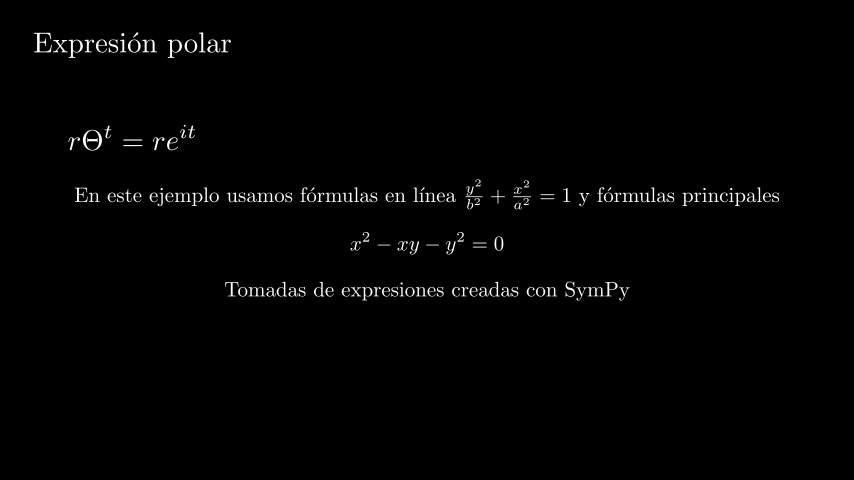

In [147]:
%%manim -ql ShowTex2
x=Symbol('x',complex='True')
y=Symbol('y',complex='True')
a=Symbol('a',complex='True')
b=Symbol('b',complex='True')
Theta_omega_t= sp.Equality(Theta**(omega*t),exp(i*omega*t))
Theta_t= sp.Equality(Theta**t,exp(i*t))

r =Symbol('r')
#r =Symbol('r', nonnegative=True)
expr = Eq((x/a)**2+(y/b)**2,1).simplify()
expr_polar=expr.subs({x: a*cos(theta), y: b*sin(theta)}).simplify()
phi_relation=Eq(x**2-x*y-y**2,0)
cplx_phi_relation=Eq(x**2-x*y+y**2,0)

TexCenter_=r""" 

En este ejemplo usamos fórmulas en línea ${expr}$ y fórmulas principales 
$${phi_relation}$$ 

Tomadas de expresiones creadas con SymPy


"""



TexCenter_=TexCenter_.format(expr=latex(expr),phi_relation=latex(phi_relation))

TexUL_=r""" Expresión polar 


$$r{Theta_t_lhs}=r{Theta_t_rhs}$$



"""
TexUL_=TexUL_.format(Theta_t_lhs=latex(Theta_t.lhs),Theta_t_rhs=latex(Theta_t.rhs))

TexUR_=latex(expr_polar)
TexDL_=latex(expr_polar)
TexDR_=latex(expr_polar)



TexCenter=Tex(TexCenter_)
TexUL=Tex(TexUL_).to_edge(UL).scale(0.8)
TexUR=Tex(TexUR_).to_edge(UR)
TexDL=Tex(TexDL_).to_corner(DL)
TexDR=Tex(TexDR_).to_corner(DR)
Center_scale=0.7
UL_scale=1.2
UR_scale=1.2
DL_scale=0.65
DR_scale=0.65
Theta_x = Function('Theta_x')
Theta_y = Function('Theta_y')
Eq_Theta_rect=sp.Eq(Theta**t,Theta_x(t) + I*Theta_y(t))
Theta_rect=sp.Equality(Theta**t,Theta_x(t) + I*Theta_y(t))

Theta_rect

class ShowTex2(Scene):
    def construct(self):      
      
        
        self.add(TexCenter.scale(Center_scale))
        self.add(TexUL.scale(UL_scale))
        # self.add(TexUR.scale(UR_scale))       
        # self.add(TexDL.scale(DL_scale))
        # self.add(TexDR.scale(DR_scale))


# Escena texto y plots 

In [141]:
# Colección de textos 
intro = [imaginar_modelo_tres_cuerpos_1,imaginar_modelo_tres_cuerpos_2,describiendo_tau]
ElipseOndas=[ElipseOndas_0,ElipseOndas_1,ElipseOndas_1b ,ElipseOndas_2,ElipseOndas_3]
Claudius=[claudius_elipses_y_simetrias,la_obsesion_de_claudius,simetrias_de_claudius]
Joseph=[luz_calor_epiciclos_1,luz_calor_epiciclos_2,la_noche_de_los_descubrimientos]
Antoine=[osciloscopio_lissajous]
NumerosCompas=[notacion_usada_en_tau,intro_a_numeros_compas_1,intro_a_numeros_compas_2,intro_a_numeros_compas_3]
ExponencialesComplejas=[recordar_exponenciales_complejas_1,recordar_exponenciales_complejas_2,recordar_exponenciales_complejas_3]
Taylor=[rotaciones_de_90,rotaciones_de_90b,evaluando_sumatoria_taylor,evaluando_sumatoria_taylor_expresion,seno_impar_coseno_par]

# Colección de arrays para plot 
lemniscata_multi=[theta_xp,theta_yp,theta_xn,theta_yn,leminscata_pure] #,lemniscata
elipse_a2_b1=[Elipse_21_compas_npa,g_a_h(t_values),g_h(t_values)]

# Colección de fórmulas para ubicar en plots
Elipse_Tau=r"""$$z(t)=R_{_+} \Theta^{t} +R_{_-} \Theta^{-t}$$ """
Elipse_Tau=Tex(Elipse_Tau).scale(0.6)


In [142]:
%%manim -ql EscenaTextoyPlot_1

class EscenaTextoyPlot_1(Scene):
    def construct(self):
        
         # Escribir  texto intro 
        myfunc.play_scene(self,text_lines=intro,
            wait_seconds=13, # Tiempo de espera luego de escribir el texto
            text_scale=0.5,  # Escala del texto
            write_time=6)    # Tiempo  que demora la animación en escribir el texto entero en pantalla
        
        self.wait(1)
    
        # Escribir  texto intro a Elipses 
        myfunc.play_scene(self,text_lines=ElipseOndas,
            wait_seconds=13,
            text_scale=0.5,
            write_time=6)
        
        self.wait(1)
        
        # Realizar plot de elipse de ejemplo
        # Formula en la parte superior del plot
        self.play(Write(Elipse_Tau.to_edge(UP)))
        
        myfunc.plot_dots_for_multiplot(self,complex_arrays=elipse_a2_b1,
            run_time=16, # Tiempo que demora en dibujar el plot multiple
            lag_ratio=0.5, # Ratio para el lag con el que dibuja cada dot
            wait_after=6)  # Tiempo de espera luego de hacer el plot
        self.clear()

        #  # Escribir  texto numeros compas 
        # myfunc.play_scene(self,text_lines=NumerosCompas,
        #     wait_seconds=13,
        #     text_scale=0.5,
        #     write_time=6)
        
        # self.wait(1)

        

        # ## Plot parametrico
        # myfunc.plot_parametric(self,func=ellipse_2_1,
        
        #     t_range = t_range,
            
        #     color=RED)
    
            

## Plot paramétrico en manim

In [140]:
%%manim -qh ParametricPlot

t_range = [0,2*np.pi]

x_range=[-2, 2]
y_range=[-2, 2]
axis_config={"color": GRAY_C}
x_axis_config={"numbers_to_include":[-1,1] }
y_axis_config={"numbers_to_include":[-1,1] }
            
def ellipse_2_1(t):
    x = 2*np.cos(t)
    y = np.sin(t)
    return np.array([x, y, 0])


def lemniscate_aprox(t):
    x = 2*np.cos(t)
    y = np.sin(2 * t)
    return np.array([x, y, 0])

def lemniscate_bernoulli(t):
    a = 2  
    x = a  * np.cos(t) / (np.sin(t)**2 + 1)
    y = a  * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)
    return np.array([x, y, 0])

formulas = [
            MathTex(r"x(t) = 2 \cos(t)").set_color(BLUE),
            MathTex(r"y(t) = \sin(2t)").set_color(BLUE),
            MathTex(r"0 \leq t < 2\pi ").set_color(WHITE),
            MathTex(r"z(t)=x(t)+i y(t) ").set_color(WHITE),
            MathTex(r"x(t) = \frac{2  \cos(t)}{\sin^2(t) + 1}").set_color(YELLOW_B),
            MathTex(r"y(t) = 2\sin(t)\frac{  \cos(t) }{\sin^2(t) + 1}").set_color(YELLOW_B),
            MathTex(r"x(t) = 2 \cos(t)").set_color(GREEN_C),
            MathTex(r"y(t) = \sin(t)").set_color(GREEN_C),
            Tex(r"$x(t)= \cos t$  ;  $y(t)= \sin t$ ").set_color(RED_B)
            
        
        ]





wait_after=13

class ParametricPlot(Scene):
    def plot_parametric(self, func, t_range, color=BLUE):
        curve = ParametricFunction(func, color=color, t_range=t_range)
        self.play(Create(curve))

    def construct(self):
        # Create axes
        axes = Axes(
            x_range=x_range,
            y_range=y_range,
            axis_config=axis_config,
            
        )
        
        #self.play(Create(axes))
        self.play(Write(formulas[3].to_corner(UP)))
        self.play(Write(formulas[2].to_edge(DOWN)))
        self.play(Write(formulas[8].next_to(formulas[3],DOWN)))

        self.play(Write(Circle(radius=1)))

        
        
        self.play(Write(formulas[6].to_edge(LEFT)))
        self.play(Write(formulas[7].to_edge(RIGHT)))

        self.plot_parametric(ellipse_2_1, t_range, color=GREEN_C)

        self.play(Write(formulas[0].to_edge(UL))) 
        self.play(Write(formulas[1].to_edge(UR)))  

        self.plot_parametric(lemniscate_aprox, t_range, color=BLUE)


        self.play(Write(formulas[4].to_edge(DL)))
        self.play(Write(formulas[5].to_edge(DR)))

        self.plot_parametric(lemniscate_bernoulli, t_range, color=YELLOW_B)

        
     
        self.wait(wait_after)


## Ondas Elipse plot en Manim

## Plot y texto 

In [ ]:
# imaginar_modelo_tres_cuerpos_1
# imaginar_modelo_tres_cuerpos_2
# luz_calor_epiciclos_1
# luz_calor_epiciclos_2
# claudius_elipses_y_simetrias
# simetrias_de_claudius
# la_obsesion_de_claudius
# la_noche_de_los_descubrimientos
# intro_a_numeros_compas_1
# intro_a_numeros_compas_2
# intro_a_numeros_compas_3
# intro_a_numeros_compas_4 
# describiendo_tau
# osciloscopio_lissajous
# notacion_usada_en_tau
# recordar_exponenciales_complejas_1
# recordar_exponenciales_complejas_2
# recordar_exponenciales_complejas_3
# rotaciones_de_90
# recordando_taylor
# evaluando_sumatoria_taylor
# evaluando_sumatoria_taylor_expresion
# seno_impar_coseno_par 

' \nLos habitantes de Tau vivían en armonía con la naturaleza y las matemáticas eran parte fundamental de la cultura del planeta. \n$$ $$ \nSe enseñaban las ideas profundamente, con pasión y arte, tanto para aplicarlas a la creación de tecnologías que avanzan la sociedad,como también para describir el universo  y transmitir de generación en generación los conocimientos e intuiciones fundamentales. \n\n$$ $$ \n\nEn la descripción del video habrá enlaces a información complementaria, para distintos niveles de familiaridad con los temas tratados. \n\n$$ $$ \n\n\n'

In [ ]:
print(osciloscopio_lissajous)

 
Si en un osciloscopio, que normalmente tiene dos canales de entrada que podemos llamar (X,Y) ponemos dos señales sinusoidales distintas, es equivalente a ver la gráfica definida en ecuaciones paramétricas de :

$$x(t)=A_x \sin(\omega_x t+\alpha)$$

$$y(t)=A_y \sin(\omega_y t+\beta)$$

La relación entre las fases de las dos expresiones anteriores se suele llamar :

$$\delta=\alpha-\beta$$




## Atlas del tiempo y Números Compas

Nos imaginamos un calendario circular usado en Tau. 

In [ ]:
### Atlas del tiempo - Calendario circular en Tau 

atlas_del_tiempo_1="""
Descripción de variables usadas en Tau para describir el calendario horario :

* a para los años

* m para los meses

* d para los días

* h para las horas

"""
atlas_del_tiempo_2="""
$$\hat a=r_a\space \Theta^{\omega_a a }$$

$$\hat m=r_m\space \Theta^{\omega_m m }$$

$$\hat d=r_d \space \Theta^{\omega_d d }$$

$$\hat h=r_h\space \Theta^{\omega_h h }$$
"""
atlas_del_tiempo_3="""
Siendo 

$$\omega_a=\frac{\tau}{T_a}$$

$$\omega_m=\frac{\tau}{T_m}$$

$$\omega_d=\frac{\tau}{T_d}$$

$$\omega_h=\frac{\tau}{T_h}$$

En Tau llaman  Atlas del Tiempo  a la gráfica paramétrica obtenida combinando como epiciclos las expresiones anteriores: 

$$\hat A = \hat a+\hat m+\hat d+\hat h $$
""" 



# Aproximando la serie de Fourier 

## Serie de Fourier

Discreta:

$$x[n] = \sum_{k=0}^{N-1}c_k e^{i \omega k n} $$

$$c_k = \frac{1}{N}\sum_{n=0}^{N-1}x[n]e^{-i \omega k n}$$

$$\omega = \frac{2\pi}{P}$$

En tiempo continuo:

$$x(t) = \sum_{n=-\infty}^{\infty}c_n e^{i \omega nt}$$

$$c_n = \int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)e^{-i \omega nt}dt$$

Siendo P el período de $x(t)$ asumiendo que es periódica.

La transformada de Fourier se puede pensar como calcular los coeficientes, para
un período $P$ infinito, con lo que podemos considerar cualquier función sin necesidad de que sea periódica. 


$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i  k n \frac{2\pi }{N}}$$


Si pensamos a $\omega$ como la variable tenemos : 

$$ X(\omega) = \int_{-\infty}^{\infty} x(t) \cdot e^{-i\omega t} \, dt $$



Para darnos una idea de la ventaja de comenzar a usar números complejos, podemos ver como simplifica la creación de un código elemental que aproxima la serie para cualquier entrada real o compleja. 

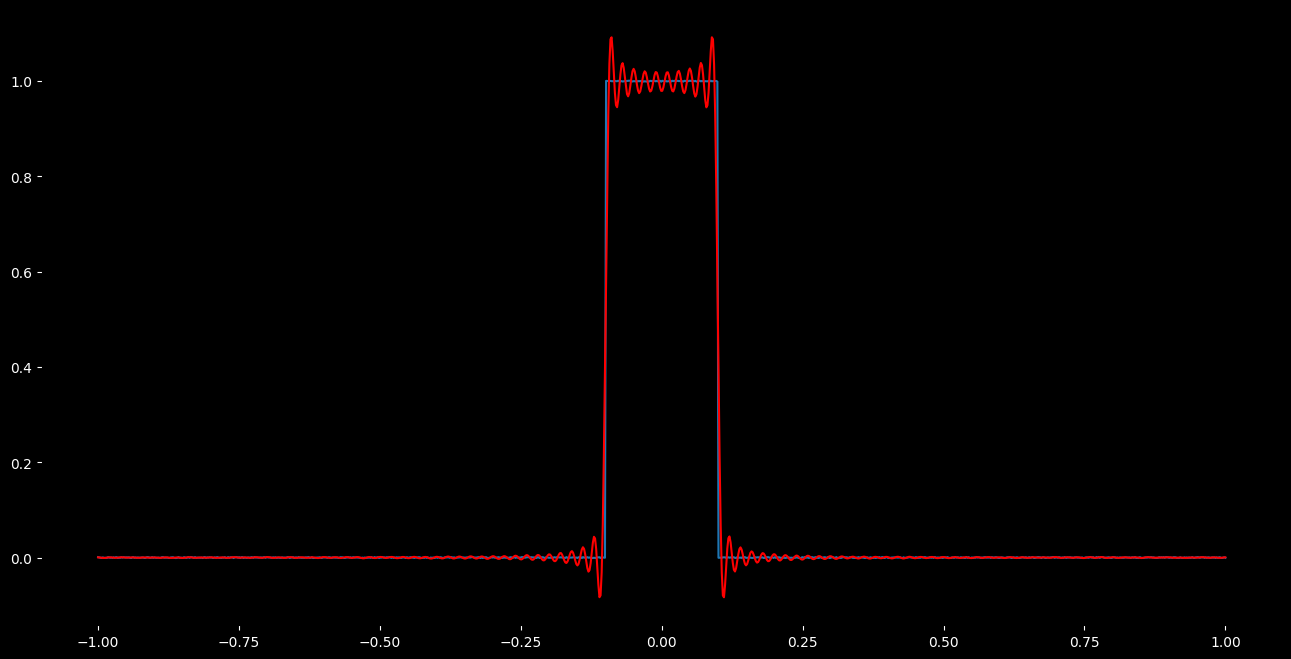

In [91]:
# Aproximando la serie de Fourier (Mirar que pasa al ir aumentando N_terminos desde valores bajos)
 
def coeficiente_n(x, t, dt, Tp, n):
    return np.trapz(x*np.exp(-1j*2*np.pi*n*t/Tp),dx=dt)*1/Tp

def coeficientes(x, t, dt, Tp, N):
    return [coeficiente_n(x, t, dt, Tp, i) for i in range(-N,N)]

def aprox_fourier(x, t, dt, Tp, N):
    _c=coeficientes(x, t, dt, Tp, N)
    out=np.zeros(len(x),dtype='complex')
    for k in range(-N,N):
        out += _c[N+k]*np.exp(1j*2*np.pi*(k)*t/Tp)
    return out

Tp = 2
w = 0.05 
N_terminos=100
N = 2**10

t = np.linspace(-Tp/2, Tp/2, N)
dt = Tp/N

pulso = np.zeros(N)
pulso[abs(t) <= w*Tp] = 1
ruido=0.002*(np.random.rand(N)-0.5)
pulso_y_ruido = pulso + ruido 
plt.figure(figsize=(16,8))
aprox_serie_fourier = aprox_fourier(pulso_y_ruido, t, dt, Tp,N_terminos )
plt.plot(t, pulso_y_ruido)
plt.plot(t, aprox_serie_fourier.real, 'r')

plt.show()